# Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from google.colab import files

# Dataset

In [106]:
df=pd.read_csv('ObesityDataSet1.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,31,1.87,128.87,yes,yes,2.96,3.00,Sometimes,yes,1.28,no,0.90,1.875,Sometimes,Automobile,Obesity_Type_II
1,Female,18,1.59,40.00,yes,yes,2.00,1.00,Frequently,no,1.00,no,0.00,2.000,no,Public_Transportation,Insufficient_Weight
2,Female,44 years,1.59,77.00,yes,yes,2.00,3.00,Sometimes,no,2.81,no,0.00,0.000,Sometimes,Automobile,Obesity_Type_I
3,Male,31,1.68,102.00,yes,yes,2.94,2.14,Sometimes,no,1.25,no,1.18,0.778,no,Public_Transportation,Obesity_Type_II
4,Male,22,1.74,75.00,yes,yes,3.00,3.00,Frequently,no,1.00,no,1.00,0.000,no,Automobile,Normal_Weight


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1055 non-null   object 
 1   Age                             1055 non-null   object 
 2   Height                          1055 non-null   float64
 3   Weight                          1055 non-null   float64
 4   family_history_with_overweight  1055 non-null   object 
 5   FAVC                            1055 non-null   object 
 6   FCVC                            1055 non-null   float64
 7   NCP                             1055 non-null   float64
 8   CAEC                            1029 non-null   object 
 9   SMOKE                           1055 non-null   object 
 10  CH2O                            1055 non-null   float64
 11  SCC                             1055 non-null   object 
 12  FAF                             10

In [108]:
# Membersihkan column 'Age'
df['Age'] = df['Age'].replace(to_replace=r'[^0-9]', value='', regex=True).astype(float)

Mengubah format penulisan dalam column 'Age' agar dapat diproses secara numerik

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1055 non-null   object 
 1   Age                             1055 non-null   float64
 2   Height                          1055 non-null   float64
 3   Weight                          1055 non-null   float64
 4   family_history_with_overweight  1055 non-null   object 
 5   FAVC                            1055 non-null   object 
 6   FCVC                            1055 non-null   float64
 7   NCP                             1055 non-null   float64
 8   CAEC                            1029 non-null   object 
 9   SMOKE                           1055 non-null   object 
 10  CH2O                            1055 non-null   float64
 11  SCC                             1055 non-null   object 
 12  FAF                             10

In [110]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1018.000000
mean,24.396209,1.703175,86.674521,2.422701,2.719649,2.018114,1.033118,0.676977
std,6.394850,0.095162,26.213231,0.529695,0.749590,0.613095,0.850566,0.603165
min,16.000000,1.460000,39.370000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.135000,2.000000,2.765000,1.620000,0.160000,0.003250
50%,23.000000,1.700000,83.150000,2.400000,3.000000,2.000000,1.000000,0.672500
75%,26.000000,1.770000,107.125000,3.000000,3.000000,2.500000,1.730000,1.000000
max,61.000000,1.980000,160.640000,3.000000,4.000000,3.000000,3.000000,2.000000


# Pre-Processing Dataset

## Cek duplicate val

In [111]:
df.duplicated().sum()

np.int64(9)

In [112]:
df.drop_duplicates(inplace=True)

## Missing Val

In [113]:
# Cek missing value
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,26
SMOKE,0


In [114]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# Lihat ulang missing value
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [115]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,31.0,1.87,128.87,yes,yes,2.96,3.00,Sometimes,yes,1.28,no,0.90,1.875,Sometimes,Automobile,Obesity_Type_II
1,Female,18.0,1.59,40.00,yes,yes,2.00,1.00,Frequently,no,1.00,no,0.00,2.000,no,Public_Transportation,Insufficient_Weight
2,Female,44.0,1.59,77.00,yes,yes,2.00,3.00,Sometimes,no,2.81,no,0.00,0.000,Sometimes,Automobile,Obesity_Type_I
3,Male,31.0,1.68,102.00,yes,yes,2.94,2.14,Sometimes,no,1.25,no,1.18,0.778,no,Public_Transportation,Obesity_Type_II
4,Male,22.0,1.74,75.00,yes,yes,3.00,3.00,Frequently,no,1.00,no,1.00,0.000,no,Automobile,Normal_Weight


## Cek Distribusi

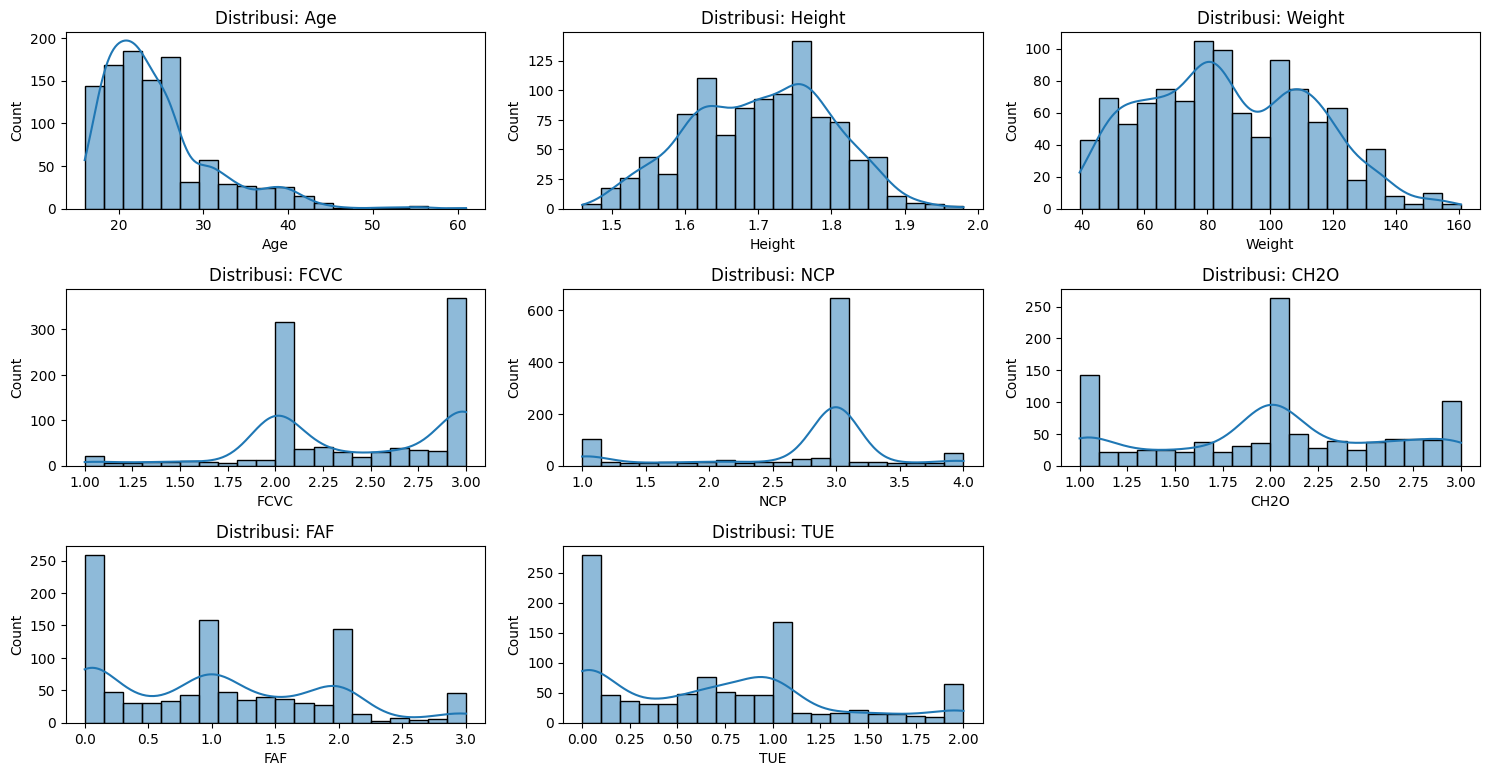

In [116]:
# Visualisasi Distribusi Fitur Numerik
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribusi: {col}')
plt.tight_layout()
plt.show()

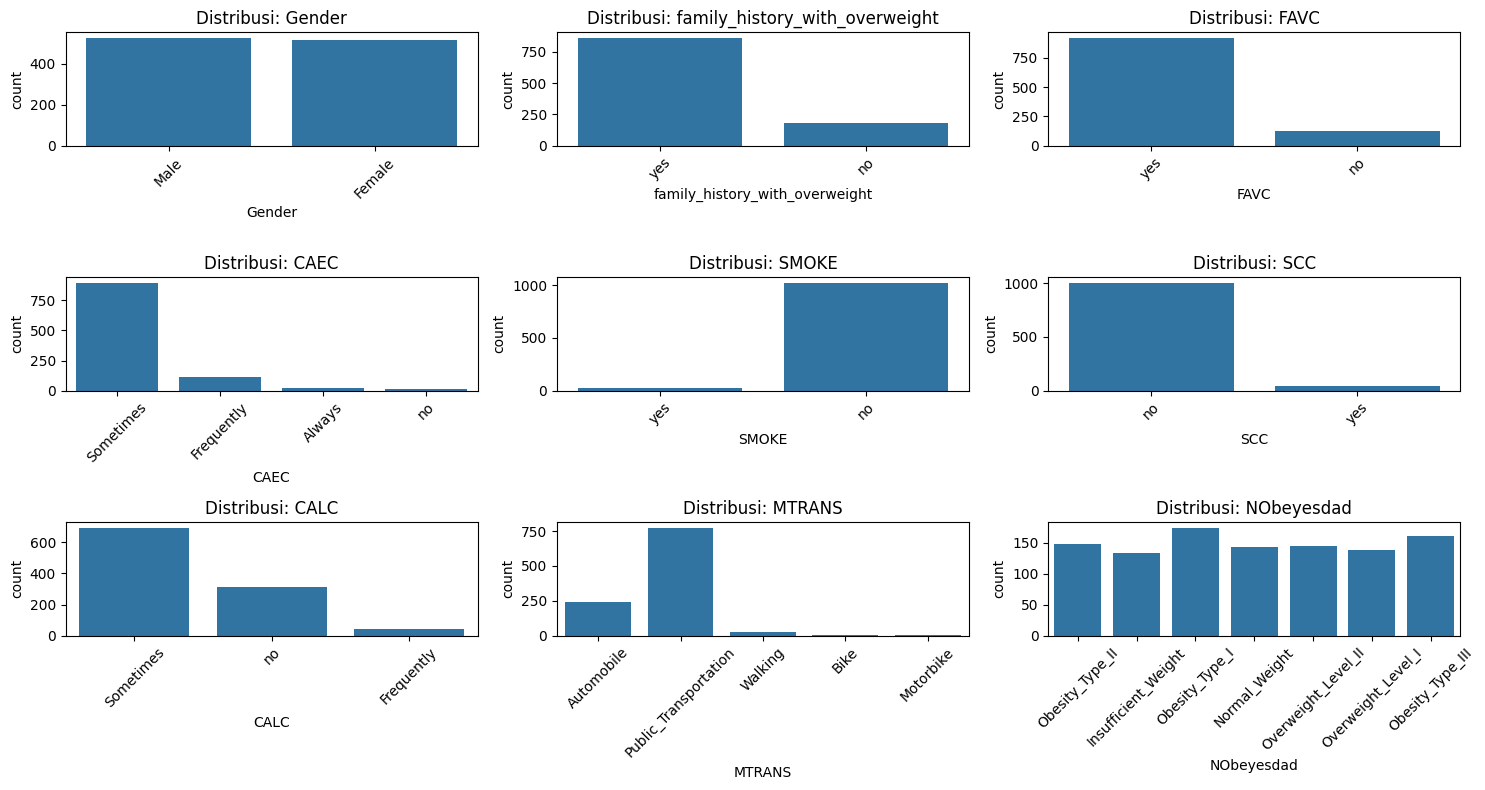

In [117]:
# Visualisasi Distribusi Fitur Kategorikal
cat_cols = df.select_dtypes(include='object').columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(f'Distribusi: {col}')
plt.tight_layout()
plt.show()

## Encoding

In [118]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,31.0,1.87,128.87,1,1,2.96,3.00,2,1,1.28,0,0.90,1.875,1,0,3
1,0,18.0,1.59,40.00,1,1,2.00,1.00,1,0,1.00,0,0.00,2.000,2,3,0
2,0,44.0,1.59,77.00,1,1,2.00,3.00,2,0,2.81,0,0.00,0.000,1,0,2
3,1,31.0,1.68,102.00,1,1,2.94,2.14,2,0,1.25,0,1.18,0.778,2,3,3
4,1,22.0,1.74,75.00,1,1,3.00,3.00,1,0,1.00,0,1.00,0.000,2,0,1


## EDA

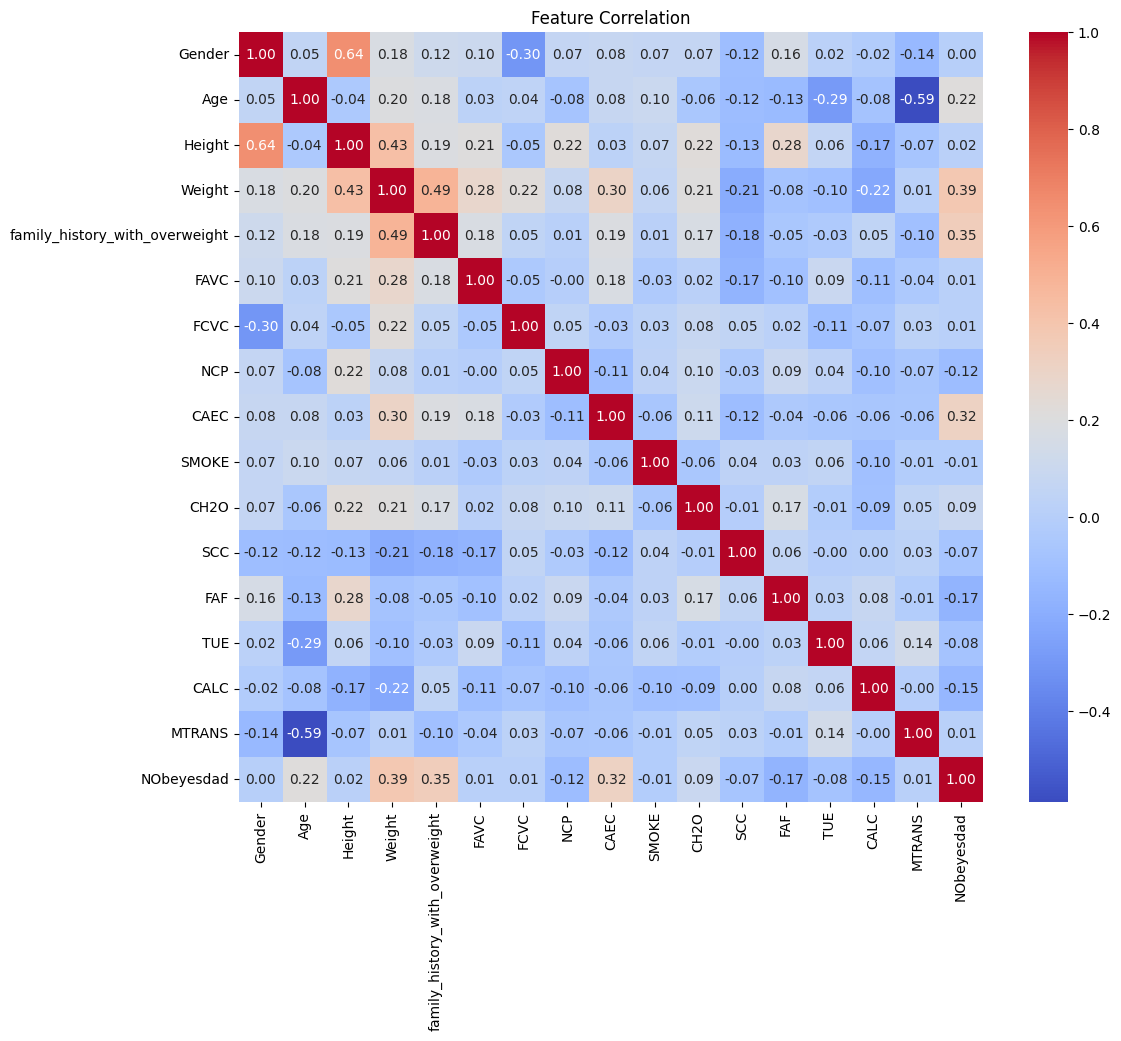

In [119]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

***NANTI JELASIN HEATMAPNYA***

# Pre-Processing

In [120]:
# Split test and training data
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# Standard Scaler -> normal dist
standard_scaler_col = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
standard_scaler = StandardScaler()
X_train[standard_scaler_col] = standard_scaler.fit_transform(X_train[standard_scaler_col])
X_test[standard_scaler_col] = standard_scaler.transform(X_test[standard_scaler_col])

# Modeling

## Logistic Regression

In [122]:
pipeline_lr = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.87      0.62      0.72        21
           2       0.80      0.72      0.76        39
           3       0.74      1.00      0.85        28
           4       1.00      1.00      1.00        29
           5       0.79      0.74      0.77        31
           6       0.76      0.74      0.75        34

    accuracy                           0.82       210
   macro avg       0.83      0.83      0.82       210
weighted avg       0.83      0.82      0.82       210



## Random Forest

In [123]:
pipeline_rf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.72      0.86      0.78        21
           2       1.00      0.95      0.97        39
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29
           5       0.92      0.77      0.84        31
           6       0.89      0.97      0.93        34

    accuracy                           0.93       210
   macro avg       0.93      0.93      0.93       210
weighted avg       0.94      0.93      0.93       210



# Pipeline

In [124]:
joblib.dump(pipeline_rf, "model_best.pkl")
files.download('model_best.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>